In [1]:
import numpy as np
from forest_fire.forest import forest_cl
import matplotlib.pyplot as plt


N = 10**6
rho_start = 0.5
p = 10**-2
f = p*(10**-2)

ffs = forest_cl(N,rho_start,p,f)
# ffs.load("forest1726959815.pkl")
# ffs.load("objs2.pkl")

100%|██████████| 50000/50000 [00:06<00:00, 7414.78it/s]


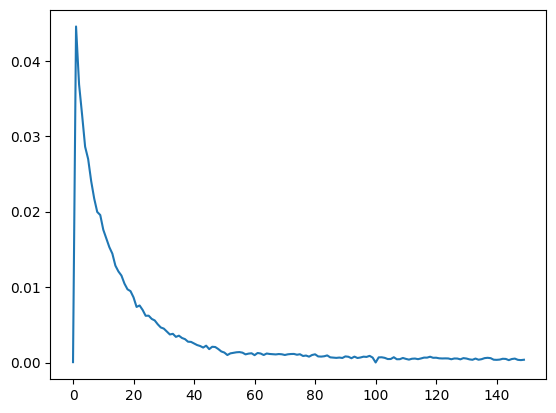

In [2]:
ffs.update(iterations=10**7)
div_hist = ffs.divergence_history


## data after equilibrium clearing burn count
ffs.burn_distribution = []
ffs.update(iterations=5*10**6)
div_hist = ffs.divergence_history
plt.plot(range(len(div_hist)),div_hist)

In [3]:
import matplotlib.pyplot as plt

rho = np.sum(ffs.forest)/ffs.N
mean_burnt_analytic = p*(1-rho)/(f*rho)
print("exact", np.mean(ffs.burn_distribution),"analytic",mean_burnt_analytic)

exact 31.304265502550887 analytic 31.005625381553887


0.16549148829985053 1.3600408153686123


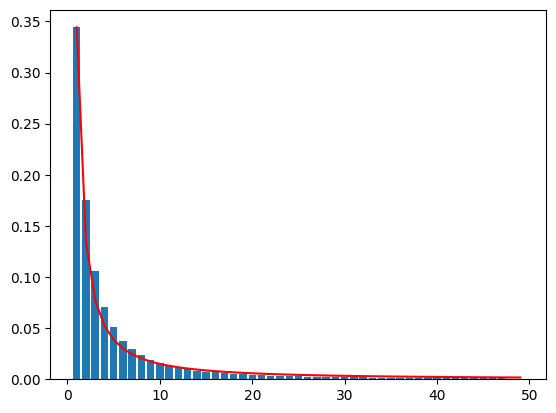

In [4]:
range_cut = 50
range_min = 1
plot_space = np.arange(range_min,range_cut)
distr = ffs.distribution[range_min:range_cut]
distr = distr/np.sum(distr)
plt.bar(plot_space,distr)


func_fit = lambda x,params : params[0]*x**(-params[1]) 
def cost(params):
    return sum(abs(distr - np.array([func_fit(t,params) for t in plot_space])))


from scipy.optimize import minimize
opt_p = minimize(cost,np.random.rand(2)).x
plt.plot(plot_space, [func_fit(t,opt_p) for t in plot_space],color="r")

print(cost(opt_p),opt_p[1])  ## critical exponent

0.37819172983818283 0.8437071449346921


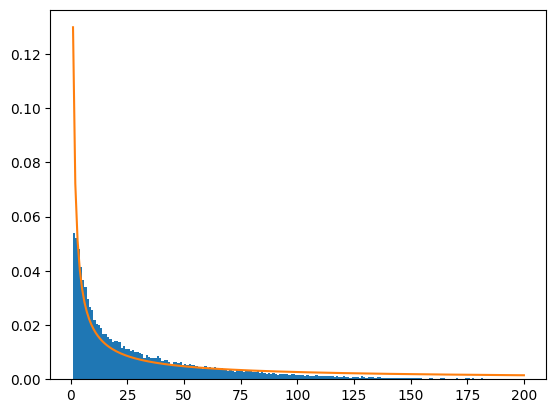

In [6]:
range_min=1
range_cut = 200
out = plt.hist(ffs.burn_distribution,bins=(range_cut-1),range=(range_min,range_cut),density=True)[0]


index_locs = np.linspace(range_min,range_cut,range_cut-1)  

func_fit = lambda x,params : params[0]*x**(-params[1])
def cost(params):
    return sum((abs(out - np.array([func_fit(t,params) for t in index_locs]))))


from scipy.optimize import minimize
opt_p = minimize(cost,np.random.rand(3)).x
print(cost(opt_p),opt_p[1])  ## critical exponent

plt.plot(index_locs, [func_fit(t,opt_p) for t in index_locs])
plt.show()

In [7]:
ffs.store("objs2.pkl")